# Rede Neuronal da condição lógica XOR
#### criando uma rede neural via pybrain para a estrutura de condição lógica XOR.

**Ou exclusivo** ou **disjunção exclusiva** (**XOR**) é uma operação lógica entre dois operandos que resulta em um valor lógico verdadeiro se e somente se os dois operandos forem diferentes, ou seja, se um for verdadeiro e o outro for falso.

### Importando as funções do pybrain

In [1]:
# importando as funções da biblioteca pybrain do python
# 'shortcuts' já nos fornece estruturas de redes neurais prontas para aplicar
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.structure.modules import SigmoidLayer
from pybrain.structure.modules import LinearLayer

In [2]:
# definindo uma rede neural com 2 neurônios na camada de entrada, 3 na camada oculta e 1 na camada de saída
# usando o melhoramento 'LinearLayer' na função de ativação da camada de saída
# usando o melhoramento 'SigmoidLayer' na função de ativação das camadas ocultas
rede = buildNetwork(2, 3, 1, outclass = LinearLayer, hiddenclass = SigmoidLayer)

In [3]:
# definindo uma base de dados com 2 entradas nos atributos previsores e 1 saída no atributo meta
base = SupervisedDataSet(2, 1)

In [4]:
# adicionando o primeiro dado para o treinamento da base de dados
base.addSample((0,0), (0, ))
# adicionando o segundo dado para o treinamento da base de dados
base.addSample((0,1), (1, ))
# adicionando o terceiro dado para o treinamento da base de dados
base.addSample((1,0), (1, ))
# adicionando o quarto dado para o treinamento da base de dados
base.addSample((1,1), (0, ))
# observe que os dados obedecem ao estilo da estrutura de condição lógica XOR

In [5]:
# visualizando os atributos previsores da base de treinamento
print(base['input'])

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [6]:
# visualizando os atributos meta da base de treinamento
print(base['target'])

[[0.]
 [1.]
 [1.]
 [0.]]


In [7]:
# visualiznado a função de ativação na camada de neurônios de entrada
print(rede['in'])

<LinearLayer 'in'>


In [8]:
# visualizando a função de ativação na camada de neurônios de saída
print(rede['hidden0'])

<SigmoidLayer 'hidden0'>


In [9]:
# visualizando a função de ativação na camada de neurônios de saída
print(rede['out'])

<LinearLayer 'out'>


In [10]:
# visualizando os parâmetros de escolha dos bias
print(rede['bias'])

<BiasUnit 'bias'>


In [11]:
# definindo o objeto de treinamento para a base de dados criada
# a taxa de aprendizagem será de 0.01
# o momentum será de 0.06
treinamento = BackpropTrainer(rede, dataset = base, learningrate = 0.01, momentum = 0.06)

In [12]:
# criando uma lista para plotar um gráfico para a taxa de erro do algoritmo
eixoX = list()
eixoY = list()

In [13]:
# estrutura de repetição para realizar o treinamento da rede neural 30000 vezes
for indice in range(1, 30000):
    # fazendo o treinamento com a base de dados criada
    erro = treinamento.train()
    eixoX.append(indice - 1)
    eixoY.append(erro)
    # mostra a taxa de erro a cada 1000 repetições
    if indice % 1000 == 0:
        print('Erro: {}'.format(erro))

Erro: 0.12485558096673324
Erro: 0.1207507092025156
Erro: 0.11272155985808016
Erro: 0.09729167728837051
Erro: 0.06224336166138503
Erro: 0.01779412840063646
Erro: 0.0019225875652021918
Erro: 0.00013016521521308505
Erro: 7.677507490069275e-06
Erro: 4.3756009189693104e-07
Erro: 2.4781290775292193e-08
Erro: 1.402606966570794e-09
Erro: 7.936647916809234e-11
Erro: 4.467016177845877e-12
Erro: 2.5262756400269067e-13
Erro: 1.4249301504164686e-14
Erro: 8.071887962205441e-16
Erro: 4.558395720362185e-17
Erro: 2.5732633240661148e-18
Erro: 1.4551281756593215e-19
Erro: 8.207510960642073e-21
Erro: 4.638146061039292e-22
Erro: 2.6197400028931263e-23
Erro: 1.4772129674928432e-24
Erro: 8.527582003948514e-26
Erro: 4.552734299300164e-27
Erro: 1.1342273295332807e-27
Erro: 1.085879843470853e-27
Erro: 1.087199009186261e-27


In [14]:
# visualizando a capacidade de predição do algoritmo
print(rede.activate([0, 0])) # saída esperada: próximo de 0
print(rede.activate([1, 0])) # saída esperada: próximo de 1
print(rede.activate([0, 1])) # saída esperada: próximo de 1
print(rede.activate([1, 1])) # saída esperada: próximo de 0

[2.49800181e-14]
[1.]
[1.]
[5.91748872e-14]


Observe que os dados foram  previstos corretamente com uma taxa de erro muito pequena. Além disso, todos os resultados da predição forma consistentes. Abaixo, vamos visualizar um gráfico que mostra o avanço do erro em cada treinamento feito.

In [16]:
# importando a biblioteca de funções matplotlib do Python
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Erro')

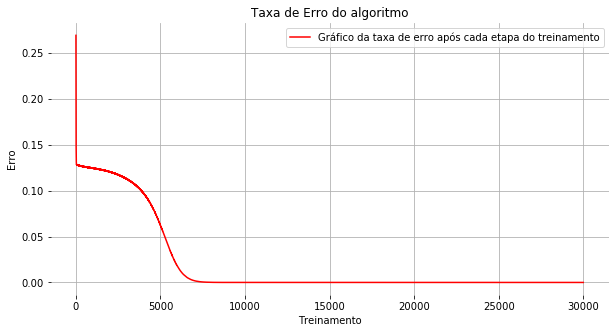

In [19]:
# definindo as dimensões do gráfico
plt.figure(figsize = (10,5))
# plotando o gráfico da taxa de erro durante cada treinamento
plt.plot(eixoX, eixoY, color = "Red", label = "Gráfico da taxa de erro após cada etapa do treinamento")
# plotando o título do gráfico
plt.title("Taxa de Erro do algoritmo")
# adicionando uma grade ao gráfico
plt.grid(True)
# removendo a moldura do gráfico
plt.box(False)
# adicionando as legendas do gráfico
plt.legend()
# adicionando uma legenda ao eixo x
plt.xlabel("Treinamento")
# adicionando uma legenda ao eixo y
plt.ylabel("Erro")

### Alguma dúvida? Entre em contato comigo:

- [Me envie um e-mail](mailto:alyssonmachado388@gmail.com);